# Introduction

Basic importing, cleaning, and exploration. Ends with a cleaned CSV file.

The data comes from [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/) and looks at water well conditions in Tanzania. It's a ternary classification problem.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

# Data Cleaning

## Importing Data

In [2]:
df_vals = pd.read_csv("../data/train_vals.csv")

In [3]:
df_labels = pd.read_csv("../data/train_labels.csv")

In [4]:
len(df_labels) == len(df_vals)

True

In [5]:
df = df_vals.join(df_labels, rsuffix='R')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,idR,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [6]:
sum(df.idR == df.id)

59400

In [7]:
df.drop('idR', inplace=True, axis=1)

## `.describe()` and Distribution Plots

In [8]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


`amount_tsh`, `gps_height`, `num_private`, `population` and `construction_year` are all continuous and have means far from their median.

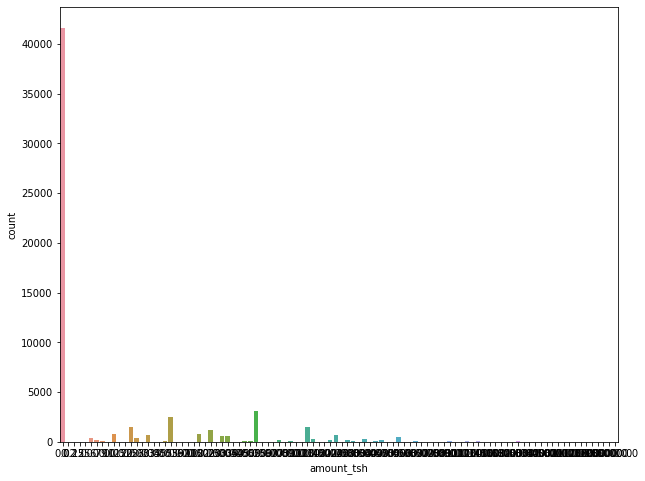

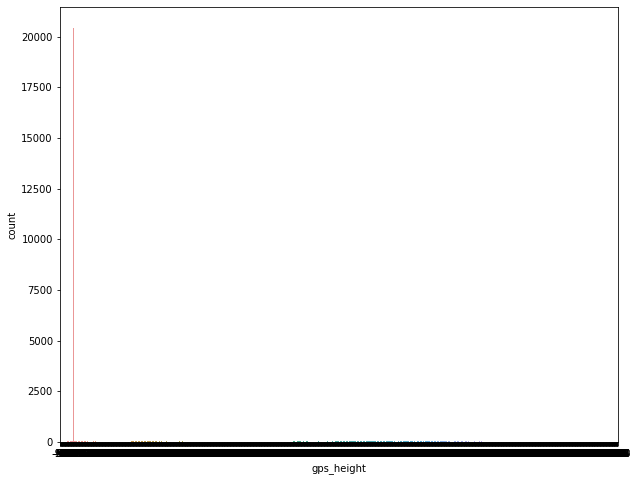

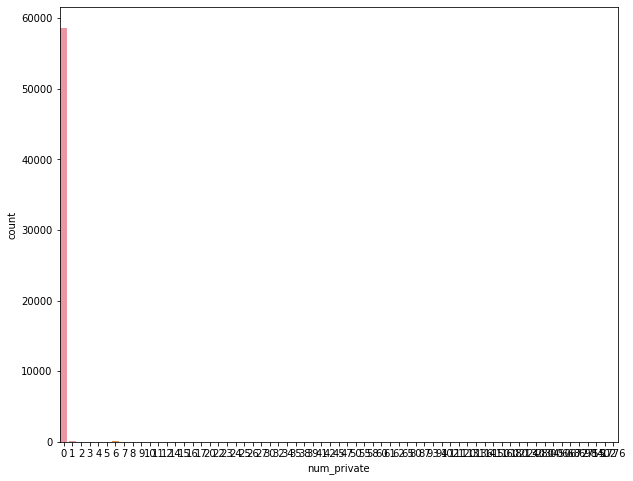

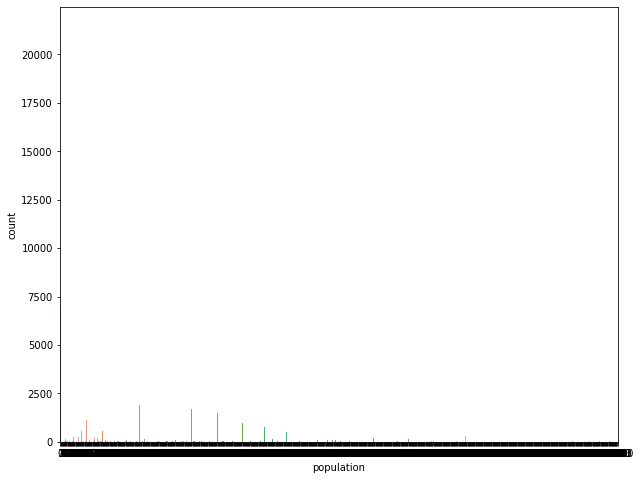

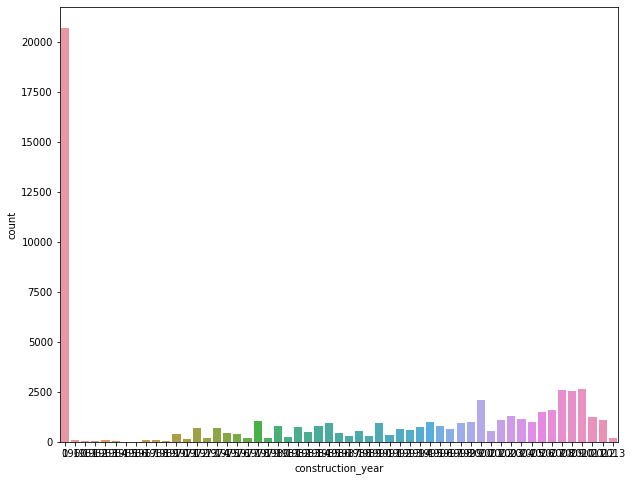

In [9]:
for col in ["amount_tsh", "gps_height", "num_private", "population", "construction_year"]:
    plt.figure(figsize=(10, 8))
    sns.countplot(x = col, data = df)
    plt.show()

`population` and `gps_height` are going to be left as-is. `amount_tsh` and `num_private` might get dropped, or have 0's replaced with a distribution via `np.random.choice`.

`construction_year` will no doubt be a huge factor in predicting status of wells, so I'm going to leave this as is for now, and try multiple approaches while modeling in the next notebook (replacing with mean, replacing with sklearn's imputation tools, replacing with distribution like mentioned before).

### `amount_tsh`

In [10]:
df.amount_tsh.value_counts(normalize = True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

So 70% of `amount_tsh` values are 0. What does that mean? It means that the "total static head" of the well (AKA the vertical column of water produced by a pump) is 0, not that there is 0 water available. At least this is what I can gather from a brief search online. As such, I'm opting to leave this column as-is, with the option to tweak later. A head of 0 may be indicative of a faulty or underpowered pump, and could correlate strongly with needs to repair.

### `num_private`

In [11]:
df.num_private.value_counts(normalize = True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

99% observations of 0 and no description to be found on DrivenData or on their forums. I'm dropping this column.

In [12]:
df.drop("num_private", inplace=True, axis=1)

## Column Names

In [13]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

All column names are described [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/), and they mostly make sense. Those with `_group` and `_class` have redundant descriptions but I'm assuming hierarchical descriptions here.

## Column Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


Most of these make sense type-wise off the bat. `payment` seems odd to not be `int64` so let's look at that. Same with `quantity`.

In [15]:
df['payment'].unique()

array(['pay annually', 'never pay', 'pay per bucket', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [16]:
df['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

Okay cool this clears things up. I was expecting numbers but they've been glossed categorically.

The `date_recorded` column can be changed to a numerical format.

In [17]:
type(df['date_recorded'][0])

str

In [18]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df['day_of_year'] = df['date_recorded'].dt.dayofyear
df['month'] = df['date_recorded'].dt.month
df.drop('date_recorded', axis=1, inplace=True)

## Unique and Missing Values

In [19]:
df.nunique()

id                       59400
amount_tsh                  98
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity

We're seeing a lot of unique values for numerical/continuous variables, which makes sense. Tons of unique categoricals too, like `subvillage` and `funder`, which could be a problem with dummies later.

Now let's look to see if any of these unique values are NaN's, other placeholders, or something that just doesn't make sense. First, NaN's:

In [20]:
df.isna().sum()

id                           0
amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

Seven columns have NaN's. These will be handled on a case-by-case basis.

### `scheme_name`

In [21]:
df.drop("scheme_name", inplace=True, axis=1)

### `permit`, `public_meeting`, `installer`, `funder`, `scheme_management`

Unique values randomly replace NaN's at the same frequency they occur in the dataset.

> It's worth nothing that in the case of `scheme_management`, `nan` and `'None'` are assumed to be different, where `nan` is actually null and `'None'` means "no management scheme."

In [22]:
for i in ["permit", "public_meeting", "installer", "funder", "scheme_management"]:
    i_vc = df[i].value_counts(normalize=True)
    missing = df[i].isna()
    df.loc[missing, i] = np.random.choice(i_vc.index, size=len(df[missing]),p=i_vc.values)

### `subvillage`

In [23]:
df.subvillage.isna().sum() / len(df)

0.0062457912457912455

In [24]:
# drop all these rows

Minimal null values, just going to drop these rows.

In [25]:
df.dropna(inplace=True)

# Exporting Data

In [26]:
df.to_csv("../data/data_cleaned.csv")